In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Using K-Means

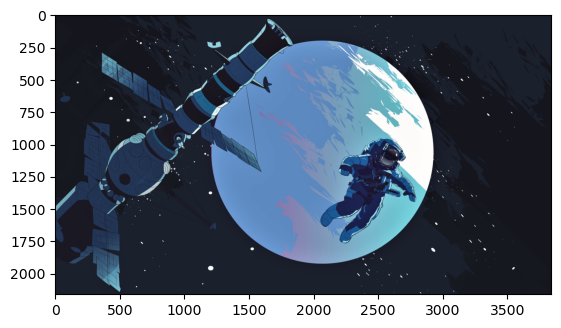

In [7]:
sample_image = cv2.imread("C:\\Kishore\\Wallpapers\\3840x2160 spacewalk.png")
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

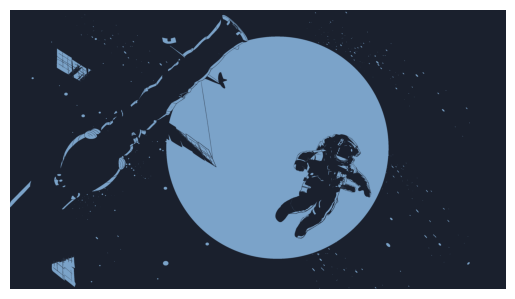

In [13]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts = 10

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
plt.imshow(result_image)

## Contour Detection

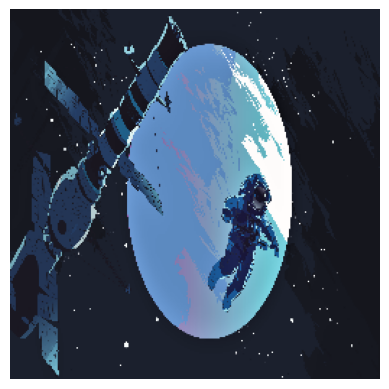

In [18]:
sample_image = cv2.imread("C:\\Kishore\\Wallpapers\\3840x2160 spacewalk.png")
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(256,256))
plt.axis("off")
plt.imshow(img)

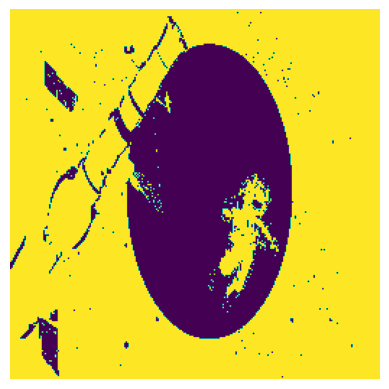

In [19]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

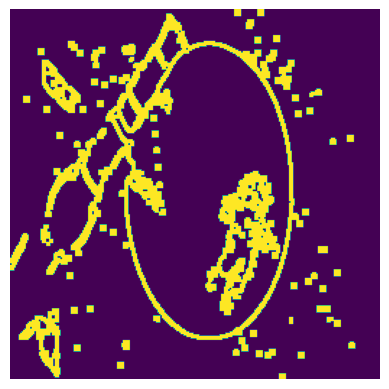

In [20]:
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)
plt.axis('off')
plt.imshow(edges)

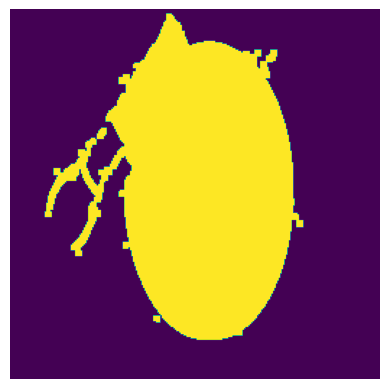

In [21]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.axis('off')
plt.imshow(masked)

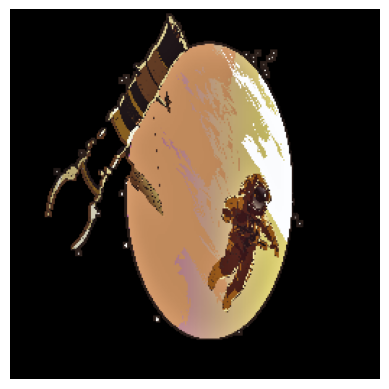

In [22]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(segmented)

## Thresholding

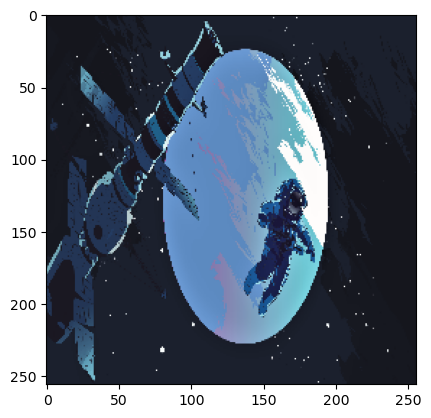

In [24]:
plt.imshow(img)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


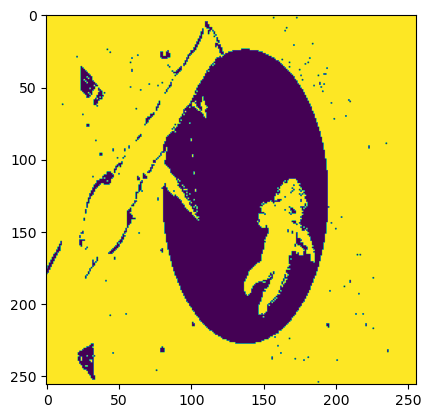

In [25]:
from skimage.filters import threshold_otsu

img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

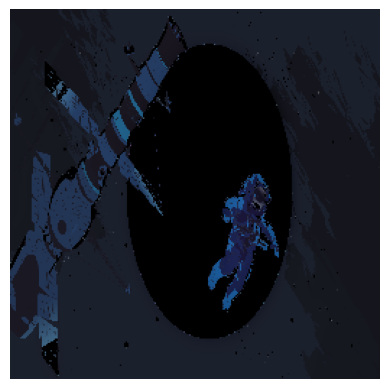

In [26]:
def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, img_otsu)

plt.axis('off')
plt.imshow(filtered)